In [1]:
# Importing necessary libraries
import numpy as np
from scipy.stats import norm
from scipy.stats import poisson
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Defining Kullback-Leibler divergence function
def kl(p, q):
    result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
    return result

In [3]:
# Generating array from -10 to 10 with step 0.001
x = np.arange(-10, 10, 0.001)
len(x)

20000

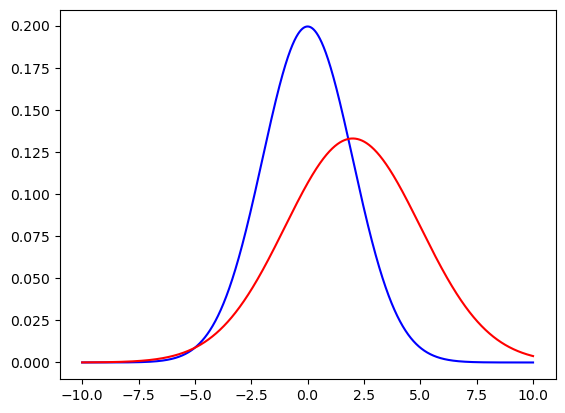

In [4]:
# Generating normal distributions
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 3)
plt.plot(x, p, c='blue')
plt.plot(x, q, c='red')

In [5]:
# Computing KL divergence between p and q
kl(p, q)

349.91348337868124

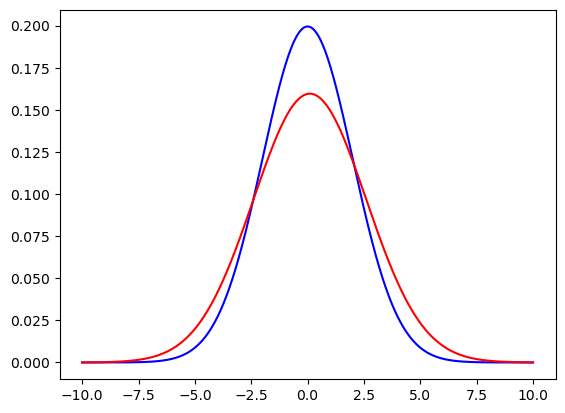

In [6]:
# Reassigning p and q with different means
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 0.1, 2.5)
plt.plot(x, p, c='blue')
plt.plot(x, q, c='red')

In [7]:
# Computing KL divergence between p and q
kl(p, q)

43.94620233653506

In [8]:
# Reading data from 'weight-height.csv'
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [9]:
# Calculating mean height by gender
data.groupby('Gender').mean()

,Height,Weight
Gender,,
Female,63.708774,135.860093
Male,69.026346,187.020621


<Axes: >

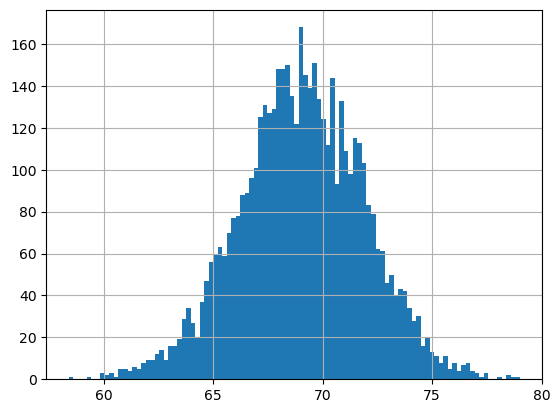

In [10]:
# Extracting heights of males
males = data[data['Gender'] == 'Male']['Height']
males.hist(bins=100)

In [11]:
# Mean height of males
males.describe()['mean']

69.02634590621741

In [12]:
# Standard deviation of height of males
males.describe()['std']

2.863362228660651

In [13]:
# Calculating histogram of males' heights
count, devision = np.histogram(males, bins=100)
print(count)
print(devision)

[  1   0   0   0   1   0   0   3   2   3   1   5   5   4   6   5   8   9
   9  12  14   9  16  16  19  29  34  27  20  37  47  56  60  63  59  70
  77  78  88  89  96 101 125 131 127 129 148 148 150 135 122 168 145 139
 151 134 124 112 144  93 133 109  98 115 113 103  83  79  62  61  46  50
  40  43  42  34  28  30  16  20  13  11   8  11   5   8   4   7   8   4
   3   1   3   0   0   1   0   2   1   1]
[58.40690493 58.61282331 58.81874168 59.02466005 59.23057843 59.4364968
 59.64241518 59.84833355 60.05425192 60.2601703  60.46608867 60.67200705
 60.87792542 61.0838438  61.28976217 61.49568054 61.70159892 61.90751729
 62.11343567 62.31935404 62.52527241 62.73119079 62.93710916 63.14302754
 63.34894591 63.55486429 63.76078266 63.96670103 64.17261941 64.37853778
 64.58445616 64.79037453 64.9962929  65.20221128 65.40812965 65.61404803
 65.8199664  66.02588478 66.23180315 66.43772152 66.6436399  66.84955827
 67.05547665 67.26139502 67.46731339 67.67323177 67.87915014 68.08506852
 68.290986

In [14]:
# Generating ideal distribution with mean and standard deviation of males' heights
ideal = norm.rvs(size=len(males), loc=males.describe()['mean'], scale=males.describe()['std'])
print(ideal)

[66.59118512 71.09599536 67.0160349  ... 71.7249158  67.22554884
 72.36793829]


In [15]:
# Calculating histogram of ideal distribution
icount, idevision = np.histogram(ideal, bins=100)
print(icount)
print(idevision)

[  1   0   0   0   0   0   0   1   1   1   1   0   2   4   1   2   2   8
   6   5  12   9  12  15  16  22  31  24  24  32  43  48  49  51  57  59
  64  53  86  67 109  81 113 114 112 112 103 120 122 118 116 123 143 127
 133 157 151 132 127 117 103 128 103 105 111 129 111  81  85  81  74  74
  48  74  56  48  55  33  34  33  31  24  16  18  18   8  11  12   9   9
   8   8   1   5   3   4   4   3   1   2]
[58.29656488 58.49328797 58.69001106 58.88673415 59.08345724 59.28018033
 59.47690342 59.67362651 59.8703496  60.06707269 60.26379578 60.46051887
 60.65724196 60.85396505 61.05068814 61.24741123 61.44413432 61.64085741
 61.8375805  62.03430359 62.23102668 62.42774977 62.62447286 62.82119595
 63.01791904 63.21464213 63.41136522 63.60808831 63.8048114  64.00153449
 64.19825758 64.39498067 64.59170377 64.78842686 64.98514995 65.18187304
 65.37859613 65.57531922 65.77204231 65.9687654  66.16548849 66.36221158
 66.55893467 66.75565776 66.95238085 67.14910394 67.34582703 67.54255012
 67.73927

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   1.,
          0.,   2.,   4.,   1.,   2.,   2.,   8.,   6.,   5.,  12.,   9.,
         12.,  15.,  16.,  22.,  31.,  24.,  24.,  32.,  43.,  48.,  49.,
         51.,  57.,  59.,  64.,  53.,  86.,  67., 109.,  81., 113., 114.,
        112., 112., 103., 120., 122., 118., 116., 123., 143., 127., 133.,
        157., 151., 132., 127., 117., 103., 128., 103., 105., 111., 129.,
        111.,  81.,  85.,  81.,  74.,  74.,  48.,  74.,  56.,  48.,  55.,
         33.,  34.,  33.,  31.,  24.,  16.,  18.,  18.,   8.,  11.,  12.,
          9.,   9.,   8.,   8.,   1.,   5.,   3.,   4.,   4.,   3.,   1.,
          2.]),
 array([58.29656488, 58.49328797, 58.69001106, 58.88673415, 59.08345724,
        59.28018033, 59.47690342, 59.67362651, 59.8703496 , 60.06707269,
        60.26379578, 60.46051887, 60.65724196, 60.85396505, 61.05068814,
        61.24741123, 61.44413432, 61.64085741, 61.8375805 , 62.03430359,
        62.23102668, 62.42

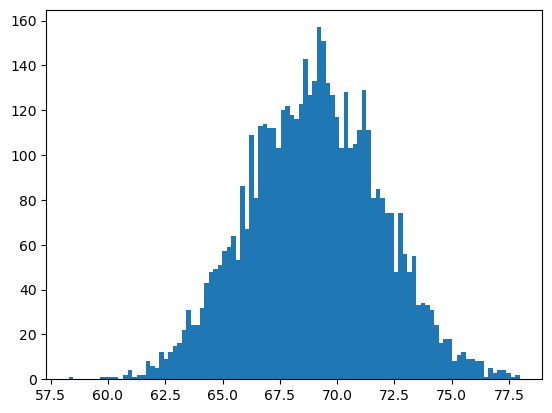

In [16]:
# Plotting histogram of ideal distribution
plt.hist(ideal, bins=100)

In [17]:
# Computing histogram of males' heights with normalized counts
count = count / 5000

In [18]:
# Computing histogram of ideal distribution with normalized counts
icount = icount / 5000

In [19]:
# Computing KL divergence between counts and ideal counts
kl(count, icount)

C:\Users\REZA\AppData\Local\Temp\ipykernel_1012\718811575.py:3: RuntimeWarning: divide by zero encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\REZA\AppData\Local\Temp\ipykernel_1012\718811575.py:3: RuntimeWarning: invalid value encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\REZA\AppData\Local\Temp\ipykernel_1012\718811575.py:3: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\REZA\AppData\Local\Temp\ipykernel_1012\718811575.py:3: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))


0.03669783674772833

In [20]:
# Generating Poisson distribution with mean of males' heights
idealp = poisson.rvs(males.describe()['mean'], size=len(males))

In [21]:
# Computing histogram of Poisson distribution with normalized counts
ipcount, ipdevision = np.histogram(idealp, bins=100)

In [22]:
# Normalizing counts of Poisson distribution
ipcount = ipcount / 5000

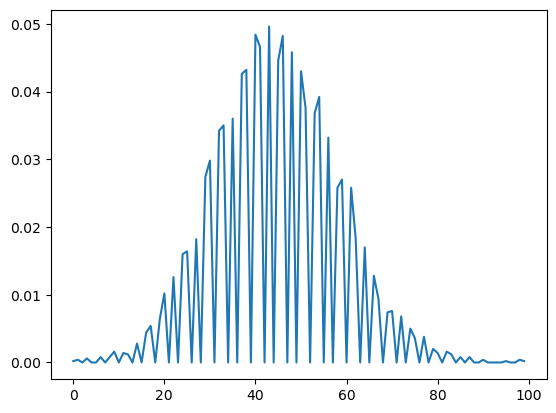

In [23]:
# Plotting histogram of Poisson distribution
plt.plot(ipcount)

In [24]:
# Computing KL divergence between Poisson counts and original counts
kl(ipcount, count)

C:\Users\REZA\AppData\Local\Temp\ipykernel_1012\718811575.py:3: RuntimeWarning: divide by zero encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\REZA\AppData\Local\Temp\ipykernel_1012\718811575.py:3: RuntimeWarning: invalid value encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\REZA\AppData\Local\Temp\ipykernel_1012\718811575.py:3: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\REZA\AppData\Local\Temp\ipykernel_1012\718811575.py:3: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))


0.59396869057272